# Detection of interictal periods in EEG signals using machine learning

## Train and test machine learning models to detect interictal periods in EEG signals with pycaret

In this notebook, we will use the pycaret library to train and test machine learning models to detect interictal periods in EEG signals. The models will be trained on features extracted from the EEG signals using pycaret. This notebook show a high-level overview of the process and the result about the best model to detect interictal periods in EEG signals. The models will be evaluated using various metrics such as accuracy, precision, recall, and F1-score. The best model will be selected based on these metrics and will be used for further analysis.

## Prepare the environment

### Install requirements

In [8]:
!pip install -r ../requirements.txt

  Using cached pycatch22-0.4.5.tar.gz (50 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of tsfresh to determine which version is compatible with other requirements. This could take a while.
  Using cached tsfresh-0.20.3-py2.py3-none-any.whl.metadata (2.6 kB)
  Using cached tsfresh-0.20.2-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached tsfresh-0.20.2-py2.py3-none-any.whl (95 kB)
  error: subprocess-exited-with-error
  
  × Building wheel for pycatch22 (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [59 lines of output]
      /tmp/pip-build-env-ioex76ns/overlay/lib/python3.12/site-packages/setuptools/config/_apply_pyprojecttoml.py:82: SetuptoolsDeprecationWarning: `project.license` as a TOML table is deprecated
      !!
      
              ********************************************************************************
             

### Global variables

In [9]:
PATH_DATASET = "../datasets"
PATH_SCRIPTS = "../scripts"
PATH_RESULTS = "../results"

### Import libraries

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib 

## Loading final dataset

In [11]:
Path_final_dataset = PATH_RESULTS+"/features/EEG_features_AllFeatures.csv"
df_final = pd.read_csv(Path_final_dataset,sep=';')
df_final

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Energy,Std,ZeroCrossings,DWT_A_Energy,DWT_A_Std,DWT_L1_Energy,DWT_L1_Std,DWT_L2_Std,DWT_L3_Std,Label
0,-0.910810,-0.432789,1.557870,1.238957,6.244845,5.608685,-0.011796,4.849851,6.243332,1.448628,...,6701313.0,28.625071,161,6.494952e+06,77.592879,1.851422e+05,18.901216,6.525675,2.479045,1
1,0.669241,-2.770761,2.628015,1.059362,5.188711,8.703730,-2.145227,8.147524,7.337089,0.293559,...,77128620.0,133.475722,72,7.466569e+07,368.810753,2.346342e+06,67.289651,18.696915,3.012844,1
2,1.796252,2.188240,-0.747876,-1.133820,-3.750040,-2.946909,-1.082376,-1.652842,-2.302908,-1.303553,...,23778006.0,71.958091,189,2.198122e+07,193.852127,1.590235e+06,55.385295,15.882118,4.972672,1
3,2.203993,2.113146,-0.424998,-1.584056,-5.539428,-5.599065,-0.269519,-3.230361,-5.071597,-1.470821,...,10945840.0,37.801572,136,1.071575e+07,103.497921,2.593951e+05,22.377317,6.419182,2.324330,1
4,0.535932,1.589788,-0.389449,-1.399532,-2.005868,-2.518123,0.547491,0.839877,-2.527554,-2.759672,...,30095867.0,84.285276,236,2.640545e+07,221.600514,2.929839e+06,75.145144,28.542184,6.026236,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,20.023325,16.020371,6.290595,4.731961,4.266542,6.531234,-11.489270,-5.686753,18.477839,-8.366114,...,5185146.0,126.518221,172,1.603541e+07,345.614337,1.217490e+06,95.318972,39.374376,6.534350,0
646,31.160014,12.274358,6.142229,4.872937,4.144671,0.125958,2.868405,7.321399,9.279057,-0.844818,...,5837538.0,115.398081,147,1.381258e+07,320.763931,2.126342e+05,39.811116,24.477559,12.198242,0
647,0.635756,4.026442,0.969354,-15.829528,-19.835517,7.931998,3.804053,1.651805,4.298282,-16.361731,...,5785262.0,124.482693,166,1.453175e+07,329.283893,1.303496e+06,98.613805,18.890919,3.344671,0
648,-24.988395,20.037430,11.400389,7.526375,-10.123523,7.438246,-1.055514,0.284052,-2.857728,5.791968,...,5935519.0,123.019851,161,1.562052e+07,341.202046,4.119846e+05,55.443075,15.198340,5.862354,0


# Machine Learning

## Random Forest

### Cargar el dataset final

In [ ]:
PATH_RESULTS = "../results" 
df_final = pd.read_csv(PATH_RESULTS + "/features/EEG_features_AllFeatures.csv", sep=';')

### Separar características y etiqueta

In [13]:
X = df_final.drop(columns=["Label"])
y = df_final["Label"]

### Dividir en entrenamiento y prueba

Dividir el dataset en datos de entrenamiento y prueba, y cada parámetro tiene un propósito

X_train → 80% de las características para entrenar el modelo.

X_test → 20% de las características para evaluar el modelo.

y_train → Etiquetas correspondientes a X_train.

y_test → Etiquetas correspondientes a X_test.

Parámetros

x, y → Datos originales (X=features, y=etiquetas).

test_size=0.2 → El 20% de los datos se reserva para prueba

random_state=42 → Asegurar que la división sea reproducible

stratify=y → Mantiene la misma proporción de clases en entrenamiento y prueba.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Entrenar el modelo

Parámetros

n_estimators=200 → Número de árboles de decisión que componen el bosque.

max_depth=10 → Profundidad máxima de cada árbol (número de niveles).

min_samples_split=5 → Número mínimo de muestras necesarias para dividir un nodo en el árbol.

min_samples_leaf=3 → Número mínimo de muestras que debe tener una hoja (nodo final).

class_weight="balanced" → Ajusta los pesos de las clases automáticamente en función de su frecuencia.

random_state=42 → Fija la aleatoriedad para obtener siempre los mismos resultados en cada ejecución.

n_jobs=-1 → Se usan los núcleos del procesador para acelerar el entrenamiento.

In [15]:
rf_model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=10,           
    min_samples_split=5,    
    min_samples_leaf=3,     
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200, n_jobs=-1, random_state=42)

###  Evaluar el modelo

Accuracy: 0.9846153846153847

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        80
           1       1.00      0.96      0.98        50

    accuracy                           0.98       130
   macro avg       0.99      0.98      0.98       130
weighted avg       0.98      0.98      0.98       130



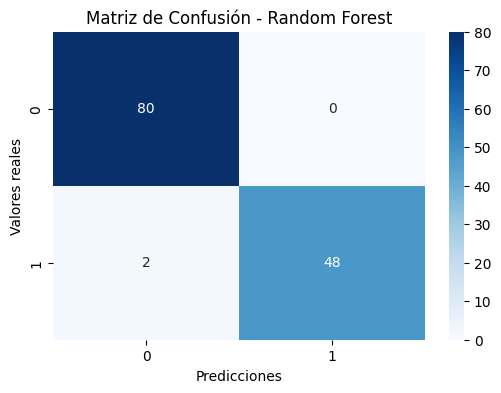

In [16]:
y_pred = rf_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Matriz de Confusión - Random Forest")
plt.show()

### Resultados

Accuracy: 0.9923 → El modelo clasificó correctamente el 99.23% de las muestras en el conjunto de prueba (130 muestras en total).

80 verdaderos negativos (TN): Clase 0 correctamente clasificada como 0.

49 verdaderos positivos (TP): Clase 1 correctamente clasificada como 1.

1 falso negativo (FN): Clase 1 mal clasificada como 0.

0 falsos positivos (FP): Ningún caso de clase 0 mal clasificado como 1.

### Importancia de características

In [22]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(importances.head(25))

                                               Feature  Importance
162                                         Complexity    0.064771
101                                     CO_FirstMin_ac    0.043994
111                        FC_LocalSimple_mean3_stderr    0.041597
112              value__partial_autocorrelation__lag_3    0.038113
170                                         DWT_L2_Std    0.033979
100                                          CO_f1ecac    0.033286
169                                         DWT_L1_Std    0.031421
128                           value__number_peaks__n_5    0.030433
127                          value__number_peaks__n_10    0.028800
104                          PD_PeriodicityWang_th0_01    0.027837
161                                           Mobility    0.026843
102                           CO_HistogramAMI_even_2_5    0.019822
109                          SB_MotifThree_quantile_hh    0.019497
168                                      DWT_L1_Energy    0.01

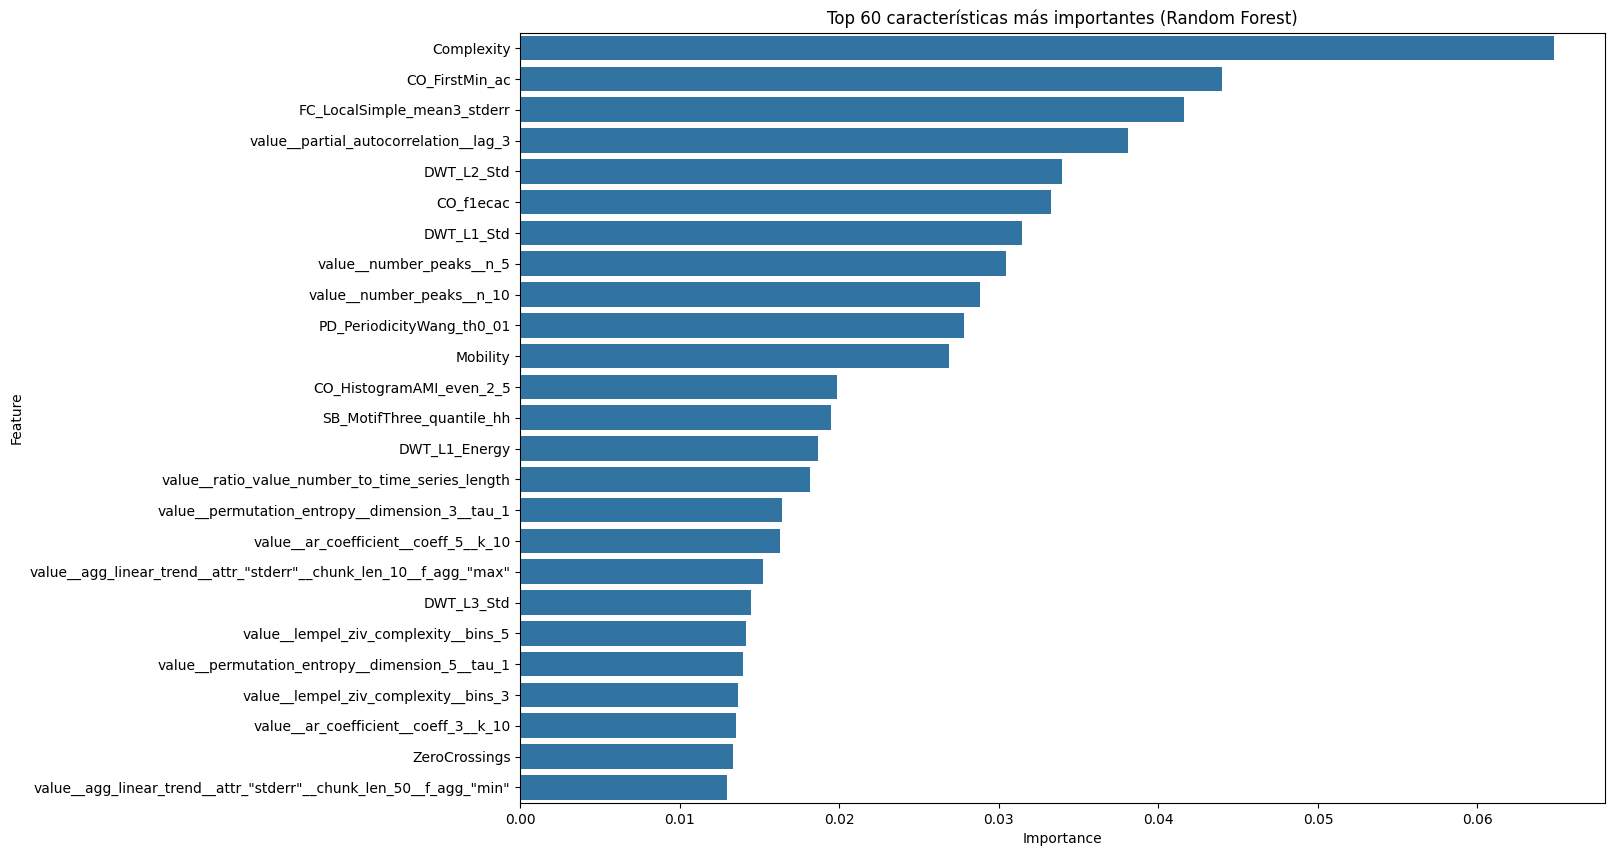

In [25]:
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(x="Importance", y="Feature", data=importances.head(25))
plt.title("Top 60 características más importantes (Random Forest)")
plt.show()